<a href="https://colab.research.google.com/github/vanessamo88/PipelineDadosTelegram/blob/main/PROJETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sumário**
### **1. Introdução**
1.1 Objetivo  

1.2 O que é Pipeline?

1.3 Pipeline do projeto

### **2. Sistema transacional**
2.1 Ingestão de dados  

2.2 O que é uma API?  

2.3 Telegram

2.3.1 Criação do bot

2.3.2 Configuração do Telegram

2.4 Mensagens

2.5 Wrangling

### **3. Sistema analítico**
3.1 Ingestão

3.2 AWS S3  

3.3 AWS Lambda  

3.4 Permissão

3.5 API Gateway

3.6 Telegram

### **4.0 ETL**
4.1 AWS S3

4.2 AWS Lambda

4.3 AWS Event Bridge

### **5. Apresentação**
5.1 AWS Athena  

5.2 Analytics
### **6. Conclusão**

# **1. Introdução**
**1.1 Objetivo**

Neste projeto, será realizada a captação de dados provenientes de um bot do Telegram, o qual irá captar todas as mensagens digitadas pelos membros do grupo ao qual o bot está instalado. O objetivo é transferir esses dados para um Datalake, realizar o processamento dos dados em lote na nuvem e então fazer a análise dos dados tratados. Com isso, é possível utitlizar essas informações para estrair insights valiosos, abrindo possibilidades para aprimorar serviços e explorar oportunidades de monetização.

**1.2 O que é Pipeline?**

Um pipeline de dados é um conjunto de processos que automatizam a coleta, transformação, armazenamento e análise de dados. Ele permite que os dados sejam transferidos de uma fonte de origem para um destino final de forma eficiente e organizada. Aqui estão os componentes principais de um pipeline de dados:

**Ingestão de Dados:** Coleta de dados de diversas fontes, como bancos de dados, arquivos, APIs, sensores, entre outros. Isso pode incluir dados estruturados, semiestruturados ou não estruturados.

**Transformação de Dados:** Limpeza, transformação e enriquecimento dos dados para que eles estejam no formato adequado para análise ou armazenamento. Isso pode incluir normalização, agregação, filtragem, e combinação de diferentes fontes de dados.

**Armazenamento de Dados:** Armazenamento dos dados transformados em um local adequado para consulta e análise. Isso pode ser feito em bancos de dados relacionais, data warehouses, data lakes, ou outras soluções de armazenamento.

**Processamento de Dados:** Execução de análises e processos sobre os dados armazenados. Isso pode incluir a execução de algoritmos de machine learning, análises estatísticas, relatórios e visualizações.

**Orquestração e Automação:** Gestão e automação de todo o fluxo de trabalho do pipeline de dados, garantindo que os processos sejam executados na ordem correta e que os dados sejam processados de forma eficiente e confiável.

**Monitoramento e Manutenção:** Monitoramento contínuo do pipeline para garantir que ele esteja funcionando corretamente, além de realizar a manutenção e ajustes necessários para lidar com problemas ou mudanças nas fontes de dados.

Os pipelines de dados são fundamentais em ambientes de big data e ciência de dados, pois permitem que grandes volumes de dados sejam processados de maneira consistente e escalável.

**1.3 Pipeline do projeto**

O pipeline de dados deste projeto começa com a captação de dados fornecidos pelos usuários do grupo do Telegram onde há um bot instalado. O bot foi configurado para captar as informações e por meio de uma API, conectar as fontes de dados à nuvem da Amazon Web Services (AWS).

Na plataforma da AWS, os dados são recebidos por uma função Lambda, que os organiza por dias no AWS S3. Diariamente, um AWS Event Bridge aciona um processo em lote no serviço Lambda, que transforma os dados brutos, extrai apenas as informações relevantes (data da mensagem, nome e número do contato, e a mensagem) e os armazena de maneira organizada no AWS S3. No processo de visualização, tabelas criadas a partir dos arquivos Parquet gerados no passo anterior possibilitam a realização de análises variadas usando a linguagem SQL. É possível extrair esses dados para um dashboard posteriormente.



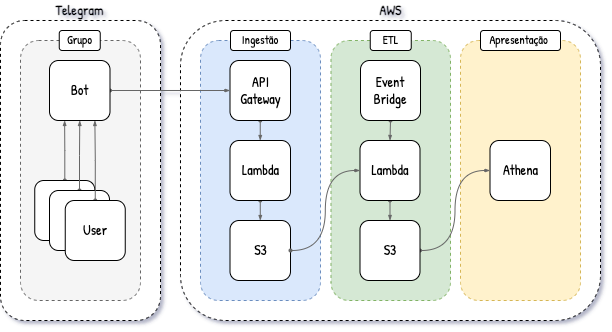

# **2. Sistema transacional**

Um sistema transacional, também conhecido como sistema de processamento de transações (Transaction Processing System - TPS), é um tipo de sistema de software que gerencia a coleta, armazenamento, modificação e recuperação de todas as informações de transações empresariais

**2.1 Ingestão de dados**
Neste projeto a ingestão dos dados consiste na captura de mensagens de texto enviadas pela plataforma do Telegram em tempo real, fornecidas por meio de uma API.

**2.2 O que é uma API?**
Uma API (Interface de Programação de Aplicações, do inglês Application Programming Interface) é um conjunto de definições e protocolos que permitem que diferentes softwares se comuniquem entre si. Basicamente, uma API define os métodos e dados que diferentes sistemas podem usar para interagir, sem precisar conhecer os detalhes internos de como eles funcionam.

**2.3 Telegram**

Um chatbot é um programa de computador projetado para simular conversas humanas. Utilizando inteligência artificial (IA) e processamento de linguagem natural (NLP), os chatbots interagem com os usuários através de texto ou voz, oferecendo respostas automatizadas e, em alguns casos, altamente personalizadas.

Neste projeto, o bot é configurado para se conectar à API do Telegram, o que permite que ele interaja com grupos, canais e usuários.
Foi programado para "ouvir" todas as mensagens que são enviadas no grupo específico. Isso é feito através de um webhook ou um polling que monitora continuamente as atualizações do grupo.
O bot coleta as mensagens enviadas pelos membros do grupo. Isso pode incluir textos, imagens, vídeos, arquivos, links, etc.

**2.3.1 Criação do bot**

Foi utilizada a função BotFather do Telegram, para ser criado um bot para "escutar" as conversas:



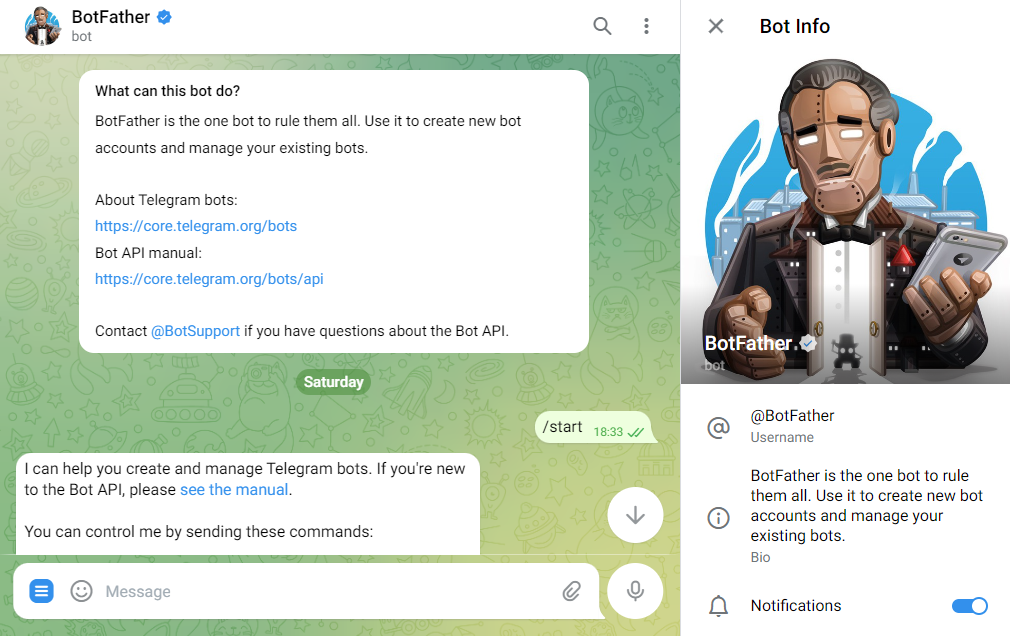

Após criação do bot, foi criado grupo onde há interesse em captar as mensagens. Nesse grupo foi adicionado o bot como administrador, para que seja possível "escutar" as mensagens:



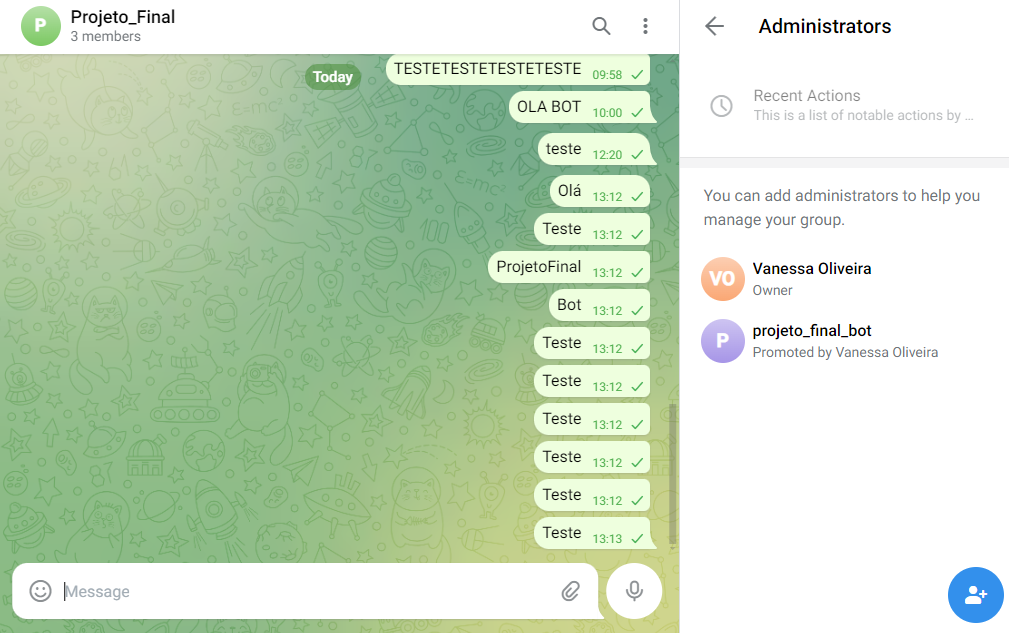

**2.3.2 Configuração do Telegram**

O Telegram representa a fonte de dados transacionais. Mensagens enviadas por usuários em um grupo são capturadas por um bot e redirecionadas via webhook do backend do aplicativo para um endpoint (endereço web que aceita requisições HTTP) exposto pelo AWS API Gateway. As mensagens trafegam no corpo ou payload da requisição.

No BotFather, é possivel conseguir um token de acesso, para que com ele, seja possivel criar a conexão do Telegram com a API.

In [9]:
#Injetando o token gerado no BotFather do Telegram
from getpass import getpass

token = getpass()


··········


A url base é comum a todos os métodos da API. Ela vai utilizar o token que foi injetado acima para conseguir acesso às mensagens do grupo do Telegram.

In [10]:
#Gerando URL base
import json

import requests

base_url = f'https://api.telegram.org/bot{token}'

O método **getMe** retorna informações sobre o bot criado, podemos ver que a conxão foi estabelecida com sucesso, e as demais informações e premissões do grupo.

In [11]:
# Método getMe retorna informações sobre o bot.
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7142624386:AAE3LWkJ8x8kP2SNCD8uYOV3al_j02T6H2U/getMe
{
  "ok": true,
  "result": {
    "id": 7142624386,
    "is_bot": true,
    "first_name": "projeto_final_bot",
    "username": "vanessamo88_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false
  }
}


O método **getUpdates** retorna as mensagens captadas pelo bot. Nela podemos ver todas as mensagens, áudios, imagens e etc enviadas por todos os usuários do grupo.

In [12]:
# Método getUpdates retorna as mensagens captadas pelo bot.
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": false,
  "error_code": 409,
  "description": "Conflict: can't use getUpdates method while webhook is active; use deleteWebhook to delete the webhook first"
}


 **2.4 Mensagens**

Uma mensagem recuperada via API é um dado semi-estruturado no formato JSON com algumas chaves mandatórias e diversas chaves opcionais, estas últimas presentes (ou não) dependendo do tipo da mensagem. Por exemplo, mensagens de texto apresentam a chave text enquanto mensagens de áudio apresentam a chave audio. Neste projeto vamos focar em mensagens do tipo texto, ou seja, vamos ingerir as chaves mandatórias e a chave text.

Podemos ver no exemplo abaixo, como a mensagem é captada, e o conteúdo do texto enviado na chave "text":

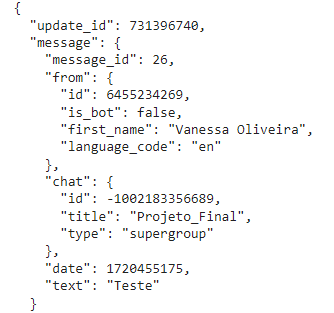

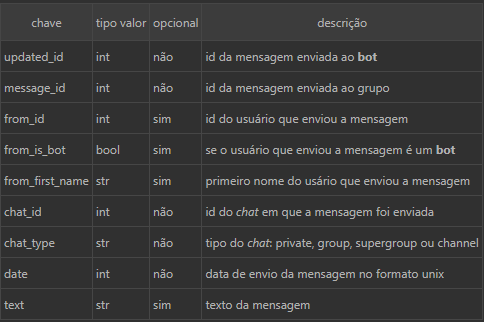

**2.5 Wrangling**

Vamos denormalizar o conteúdo da mensagem semi-estruturado no formato JSON utilizando apenas Python nativo, ou seja, sem o auxílio de pacotes, como Pandas.

Para começar, vamos carregar o arquivo telegram .json utilizando o pacote nativo json.

In [ ]:
%%writefile telegram.json
    {
      "update_id": 731396731,
      "message": {
        "message_id": 17,
        "from": {
          "id": 6455234269,
          "is_bot": false,
          "first_name": "Vanessa Oliveira",
          "language_code": "en"
        },
        "chat": {
          "id": -1002183356689,
          "title": "Projeto_Final",
          "type": "supergroup"
        },
        "date": 1720443519,
        "text": "TESTETESTETESTETESTE"
      }
    }

Overwriting telegram.json


In [ ]:
#Carregando arquivo de mensagens no formato .json
import json

with open('telegram.json', mode='r', encoding='utf8') as fp:
  data = json.load(fp)
  data = data["message"]

In [ ]:
print(json.dumps(data, indent=2))

{
  "message_id": 17,
  "from": {
    "id": 6455234269,
    "is_bot": false,
    "first_name": "Vanessa Oliveira",
    "language_code": "en"
  },
  "chat": {
    "id": -1002183356689,
    "title": "Projeto_Final",
    "type": "supergroup"
  },
  "date": 1720443519,
  "text": "TESTETESTETESTETESTE"
}


Vamos então utilizar um laço de repetição para varrer todas as chaves do arquivo e selecionar apenas as de interesse. Caso a mensagem não possua a chave text, ela será criada com o valor igual a None. Além disso, vamos adicionar duas chaves de tempo para indicar o momento em que o dado foi *processado*: **context_date e context_timestamp.**

In [ ]:
#Extraindo dados denormalizados
from datetime import datetime

date = datetime.now().strftime('%Y-%m-%d')
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

parsed_data = dict()

for key, value in data.items():

    if key == 'from':
        for k, v in data[key].items():
            if k in ['id', 'is_bot', 'first_name']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key == 'chat':
        for k, v in data[key].items():
            if k in ['id', 'type']:
              parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

    elif key in ['message_id', 'date', 'text']:
        parsed_data[key] = [value]

if not 'text' in parsed_data.keys():
  parsed_data['text'] = [None]

parsed_data['context_date'] = [date]
parsed_data['context_timestamp'] = [timestamp]

In [ ]:
for k, v in parsed_data.items():
  print(f"{k}: {v}")

message_id: [17]
user_id: [6455234269]
user_is_bot: [False]
user_first_name: ['Vanessa Oliveira']
chat_id: [-1002183356689]
chat_type: ['supergroup']
date: [1720443519]
text: ['TESTETESTETESTETESTE']
context_date: ['2024-07-08']
context_timestamp: ['2024-07-08 18:14:43']


Por fim, vamos utilizar o pacote Python PyArrow para criar uma tabela com os dados processados que, posteriormente, pode ser facilmente persistida em um arquivo no formato Apache Parquet.

In [ ]:
#Criando tabela dos arquivos extraídos
import pyarrow as pa

table = pa.Table.from_pydict(mapping=parsed_data)
table

pyarrow.Table
message_id: int64
user_id: int64
user_is_bot: bool
user_first_name: string
chat_id: int64
chat_type: string
date: int64
text: string
context_date: string
context_timestamp: string
----
message_id: [[17]]
user_id: [[6455234269]]
user_is_bot: [[false]]
user_first_name: [["Vanessa Oliveira"]]
chat_id: [[-1002183356689]]
chat_type: [["supergroup"]]
date: [[1720443519]]
text: [["TESTETESTETESTETESTE"]]
context_date: [["2024-07-08"]]
context_timestamp: [["2024-07-08 18:14:43"]]

# **3. Sistema analítico**

**3.1 Ingestão**

A etapa de ingestão é responsável, como seu o próprio nome diz, pela ingestão dos dados transacionais em ambientes analíticos. De maneira geral, o dado ingerido é persistido no formato mais próximo do original, ou seja, nenhuma transformação é realizada em seu conteúdo ou estrutura (schema). Como exemplo, dados de uma API web que segue o formato REST (representational state transfer) são entregues, logo, persistidos, no formato JSON.

Persistir os dados em seu formato original trás muitas vantagens, como a possibilidade de reprocessamento.

Pode ser conduzida de duas formas:

*   **Batch**: blocos de dados são ingeridos em uma frequência bem definida, geralmente na escala de horas ou dias;
*   **Streaming**: dados são ingeridos conforme são produzidos e disponibilizados.

No projeto, as mensagens capturadas pelo bot podem ser ingeridas através da API web de bots do Telegram, portanto são fornecidos no formato JSON. Como o Telegram retem mensagens por apenas 24h em seus servidores, a ingestão via streaming é a mais indicada. Para que seja possível esse tipo de ingestão seja possível, vamos utilizar um webhook (gancho web), ou seja, vamos redirecionar as mensagens automaticamente para outra API web.

Sendo assim, precisamos de um serviço da AWS que forneça um API web para receber os dados redirecionados, o AWS API Gateway. Dentre suas diversas funcionalidades, o AWS API Gateway permite o redirecionamento do dado recebido para outros serviços da AWS. Logo, vamos conecta-lo ao AWS Lambda, que pode sua vez, irá armazenar o dado em seu formato original (JSON) em um bucket do AWS S3.

Sistemas que reagem a eventos são conhecidos como event-driven.

**3.2 AWS S3**

Na etapa de ingestão, o AWS S3 tem a função de passivamente armazenar as mensagens captadas pelo bot do Telegram no seu formato original: JSON. Para tanto, basta a criação de um bucket. Como padrão, vamos adicionar o sufixo -raw ao seu nome (vamos seguir esse padrão para todos os serviços desta camada).

**Nota**: um data lake é o nome dado a um repositório de um grande volume dados. É organizado em zonas que armazenam replicadas dos dados em diferentes níveis de processamento. A nomenclatura das zonas varia, contudo, as mais comuns são: raw e enriched ou bronze, silver e gold.










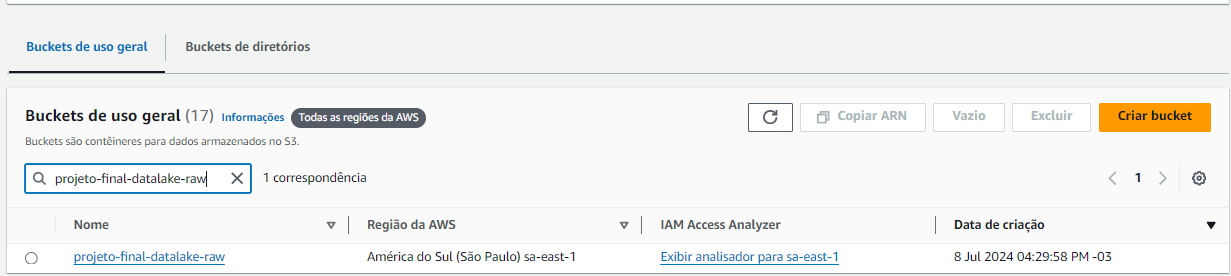

**3.3 AWS Lambda**

Na etapa de ingestão, o AWS Lambda tem a função de ativamente persistir as mensagens captadas pelo bot do Telegram em um bucket do AWS S3. Para tanto vamos criar uma função que opera da seguinte forma:

* Recebe a mensagem no parâmetro event;
* Verifica se a mensagem tem origem no grupo do Telegram correto;
* Persiste a mensagem no formato JSON no bucket do AWS S3;
* Retorna uma mensagem de sucesso (código de retorno HTTP igual a 200) a API de bots do Telegram.


**Nota:** No Telegram, restringimos a opção de adicionar o bot a grupos, contudo, ainda é possível iniciar uma conversa em um chat privado.

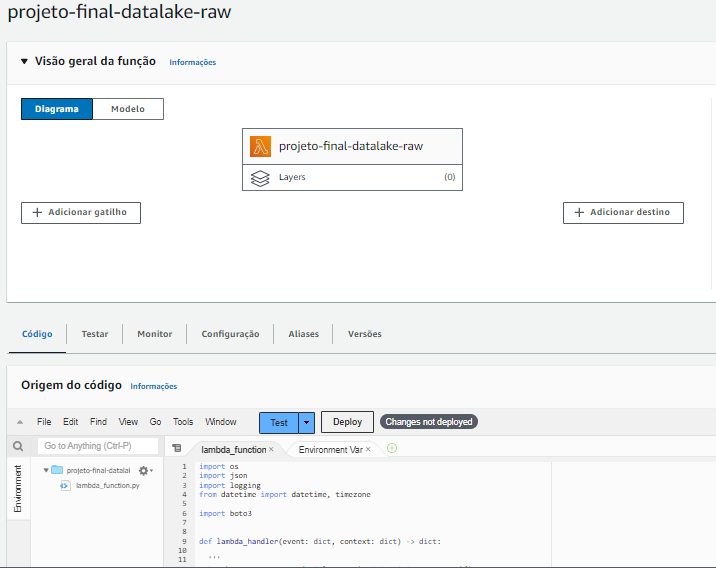

O Código da função inserido no AWS Lambda é o seguinte:


In [ ]:
import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

ModuleNotFoundError: No module named 'boto3'

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.

**Variáveis de ambiente**

Note que o código exige a configuração de duas variáveis de ambiente: **AWS_S3_BUCKET** com o nome do bucket do AWS S3 e **TELEGRAM_CHAT_ID** com o id do chat do grupo do Telegram.

Nota: Variáveis de ambiente são excelentes formas de armazenar informações sensíveis, para que não fiquem expostas no código.

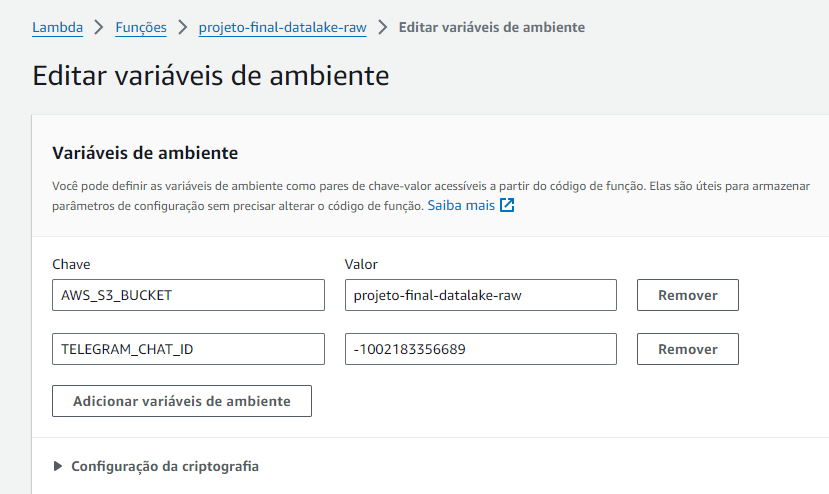

**3.4 Permissão**

Por fim, precisamos adicionar a permissão de escrita no bucket do AWS S3 para a função do AWS Lambda no AWS IAM.

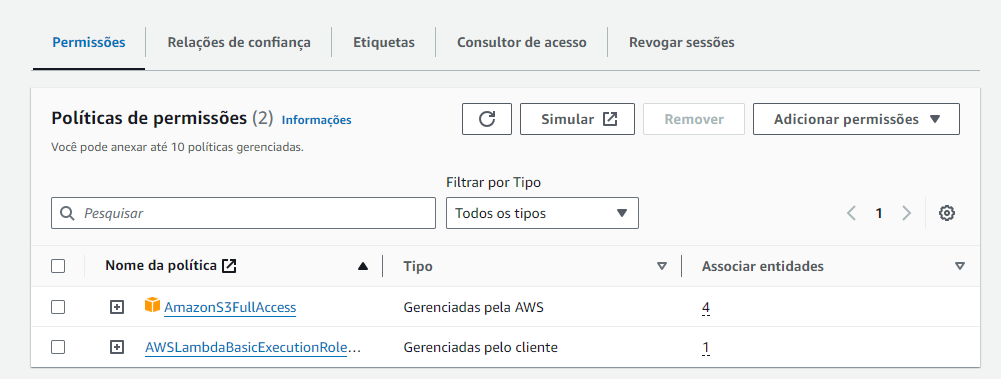

É adicionado um evento teste no AWS Lambda:


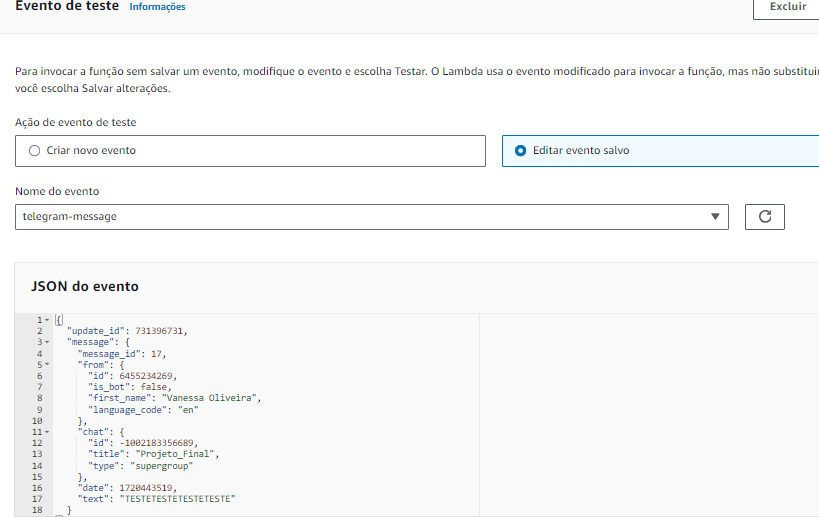

E após isso a funcionalidade é testada, retornando status 200, o que mostra que ocorreu como esperado: foi executado, chegou até o fim e salvou a mensagem teste captada no bucket do S3.

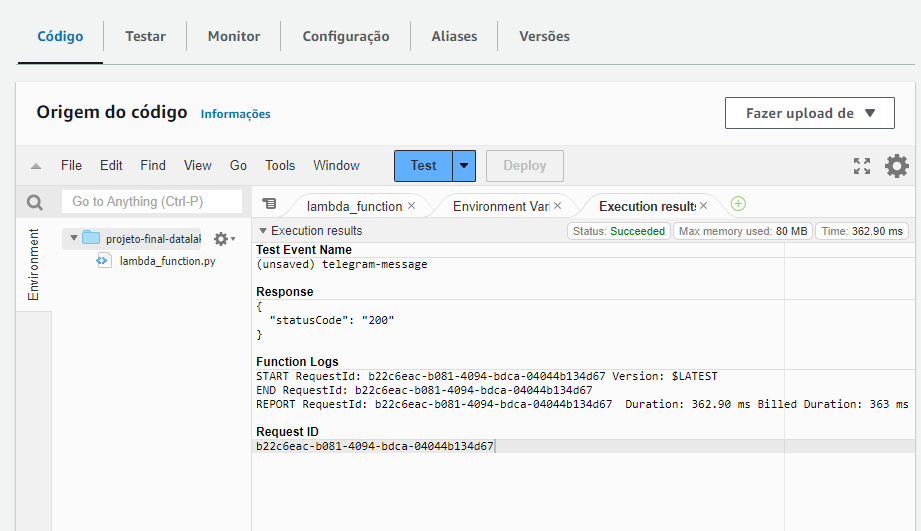

Arquivo JSON gerado no bucket do S3:

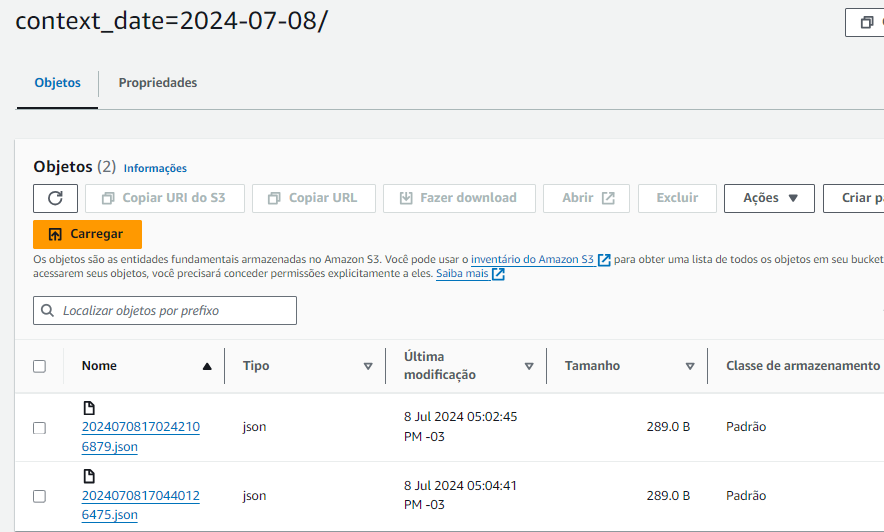

**3.5 API Gateway**

Na etapa de ingestão, o AWS API Gateway tem a função de receber as mensagens captadas pelo bot do Telegram, enviadas via webhook, e iniciar uma função do AWS Lambda, passando o conteúdo da mensagem no seu parâmetro event.

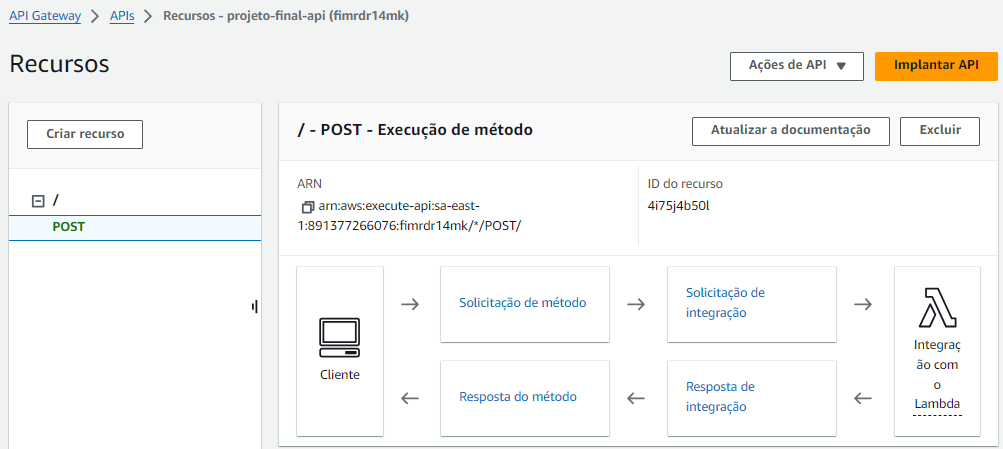

Podemos testar a integração com o AWS Lambda através da ferramenta de testes do serviço. Por fim, vamos fazer a implantação da API e obter o seu endereço web.



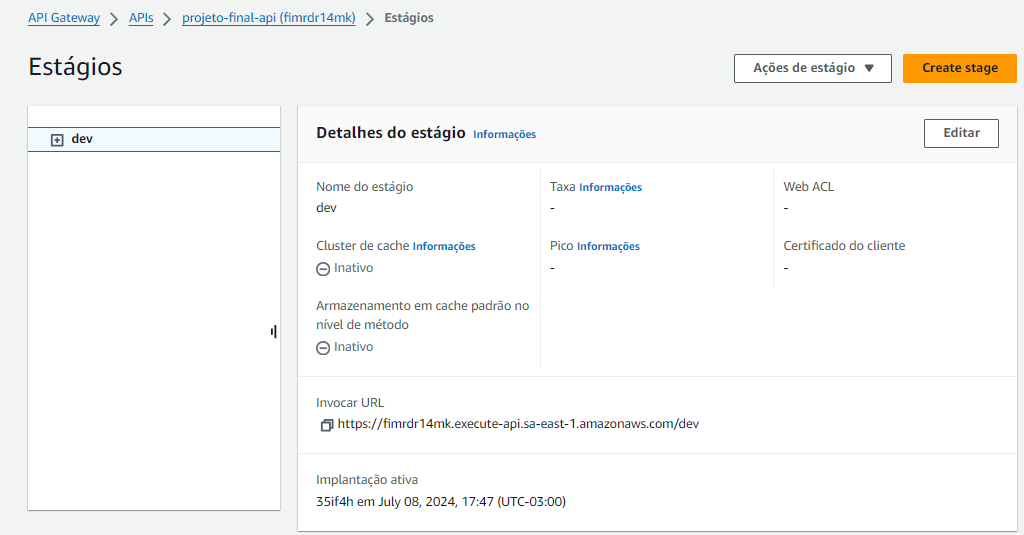

A URL gerada será ingetada para poder configurar o webhook do Telegram, para enviar os dados diretamente para o API Gateway e o Gatway passará para o Lambda e o Lambda parassá para o S3.

In [5]:
aws_api_gateway_url = getpass()

··········


**3.6 Telegram**

Vamos configurar o webhook para redirecionar as mensagens para a url do AWS API Gateway.

* **setWebhook**: o método setWebhook configura o redirecionamento das mensagens captadas pelo bot para o endereço web do paramametro url.

**Nota:** os métodos getUpdates e setWebhook são mutualmente exclusivos, ou seja, enquanto o webhook estiver ativo, o método getUpdates não funcionará. Para desativar o webhook, basta utilizar o método deleteWebhook.

In [13]:
#Configurando o redirecionamento das mensagens
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook is already set"
}


* **getWebhookInfo**: o método getWebhookInfo retorna as informações sobre o webhook configurado.

In [14]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://fimrdr14mk.execute-api.sa-east-1.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "54.94.68.16"
  }
}


# **4. ETL**

A etapa de extração, transformação e carregamento (do inglês extraction, transformation and load ou ETL) é uma etapa abrangente responsável pela manipulação dos dados ingeridos de sistemas transacionais, ou seja, já persistidos em camadas cruas ou raw de sistemas analíticos. Os processos conduzidos nesta etapa variam bastante de acordo com a área da empresa, do volume/variedade/velocidade do dado consumido, etc. Contudo, em geral, o dado cru ingerido passa por um processo recorrente de data wrangling onde o dado é limpo, deduplicado, etc. e persistido com técnicas de particionamento, orientação a coluna e compressão. Por fim, o dado processado está pronto para ser analisado por profissionais de dados.

No projeto, as mensagens de um único dia, persistidas na camada cru, serão compactas em um único arquivo, orientado a coluna e comprimido, que será persistido em uma camada enriquecida. Além disso, durante este processo, o dado também passará por etapas de data wrangling.

Para isso, vamos utilizar uma função do AWS Lambda como motor de processamento e um bucket do AWS S3 como camada enriquecida para a persistência do dado processado. Para garantir a recorrência, vamos configurar uma regra do AWS Event Bridge como gatilho diáro da função.


**4.1 AWS S3**

Na etapa de ETL, o AWS S3 tem a função de passivamente armazenar as mensagens processadas de um dia em um único arquivo no formato Parquet. Para tanto, basta a criação de um bucket. Como padrão, vamos adicionar o sufixo -enriched ao seu nome (vamos seguir esse padrão para todos os serviços desta camada).

Nota: um data lake é o nome dado a um repositório de um grande volume dados. É organizado em zonas que armazenam replicadas dos dados em diferentes níveis de processamento. A nomenclatura das zonas varia, contudo, as mais comuns são: raw e enriched ou bronze, silver e gold.

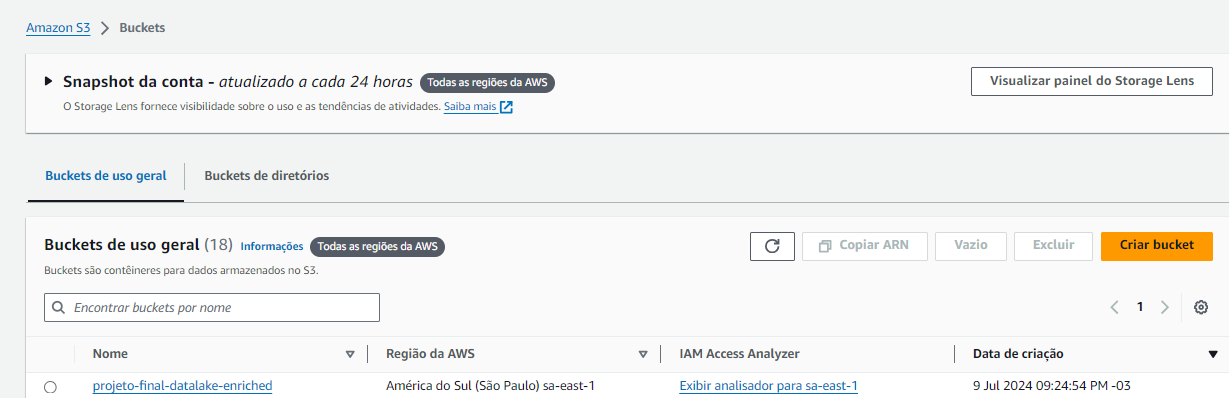

**4.2 AWS Lambda**

Na etapa de ETL, o AWS Lambda tem a função de ativamente processar as mensagens captadas pelo bot do Telegram, persistidas na camada cru no bucket do AWS S3, e persisti-las na camada enriquecida, também em um bucket do AWS S3. Logo, vamos criar uma função que opera da seguinte forma:

=> Lista todos os arquivos JSON de uma única participação da camada crua de um bucket do AWS S3;

Para cada arquivo listado:

* Faz o download do arquivo e carrega o conteúdo da mensagem;
Executa uma função de data wrangling;
* Cria uma tabela do PyArrow e a contatena com as demais.
Persiste a tabela no formato Parquet na camada enriquecida em um bucket do AWS S3.

Nota: O fato de utilizarmos duas camadas de armazenamento e processamento, permite que possamos reprocessar os dados crus de diversas maneiras, quantas vezes forem preciso.

Nota: Atente-se ao fato de que a função processa as mensagens do dia anterior (D-1).

O código da função:

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

O código da função de data wrangling:

In [ ]:
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

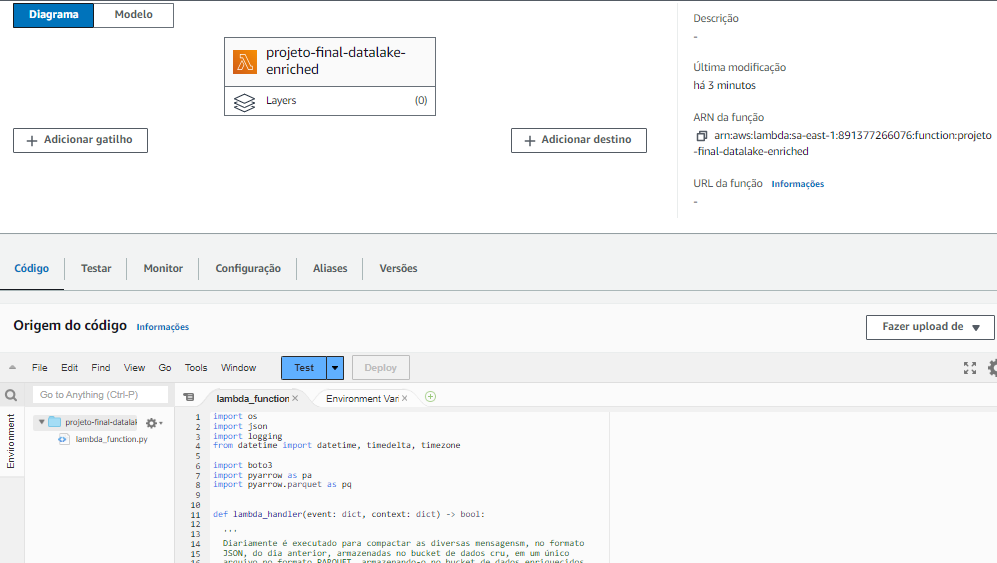

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.

* Variáveis de ambiente

Note que o código exige a configuração de duas variáveis de ambiente:

AWS_S3_BUCKET e AWS_S3_ENRICHED com os nomes dos bucket do AWS S3 da camada cru e enriquecida, respectivamente. Para adicionar variáveis de ambiente em uma função do AWS Lambda, basta acessar configurações -> variáveis de ambiente no console da função.

* Permissão

Precisamos adicionar a permissão de escrita nos buckets do AWS S3 para a função do AWS Lambda no AWS IAM.

* Recursos

O timeout padrão de funcões do AWS Lambda é de 3 segundos. Para a função, vamos aumentar o tempo para 5 minutos, principalmente para lidar com o IO (input/output) de arquivos do AWS S3.

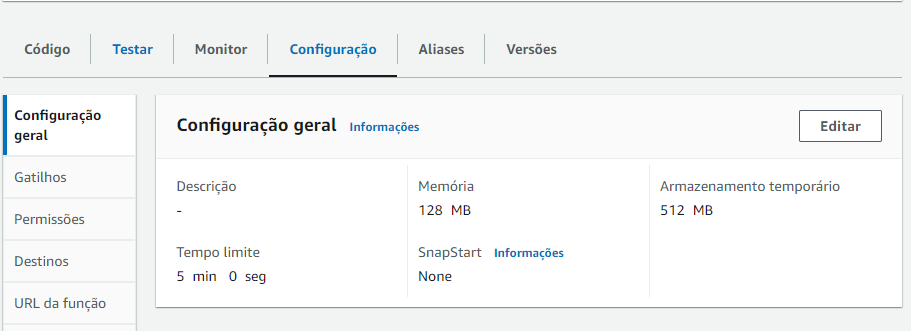

* Camadas

Por fim, note que o código da função utiliza o pacote Python PyArrow. Contudo, o ambiente padrão do AWS Lambda possui poucos pacotes externos instalado, como o pacote Python boto3, logo o PyArrow não será encontrado e a execução da função falhará. Existem algumas formas de adicionar pacotes externos no ambiente de execução do AWS Lambda, um deles é a criação de camadas ou layers, onde podemos fazer o upload dos pacotes Python direto na plataforma ou através de um bucket do AWS S3. Vamos então seguir com a última opção, onde teremos que:

- Criar um bucket no AWS S3;
- Fazer o upload do código do pacote Python do PyArrow (download neste [link](https://github.com/aws/aws-sdk-pandas/releases));


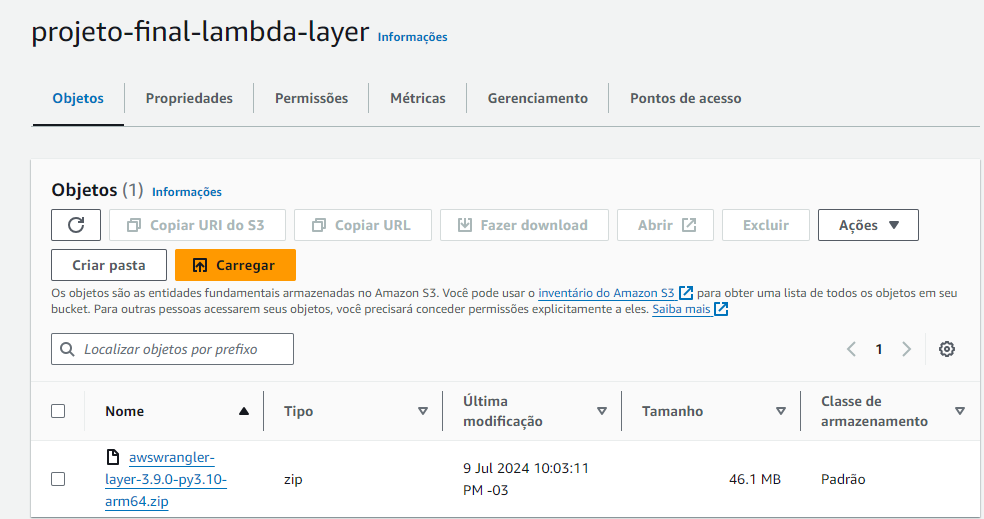

- Criar layer e conectar na função.

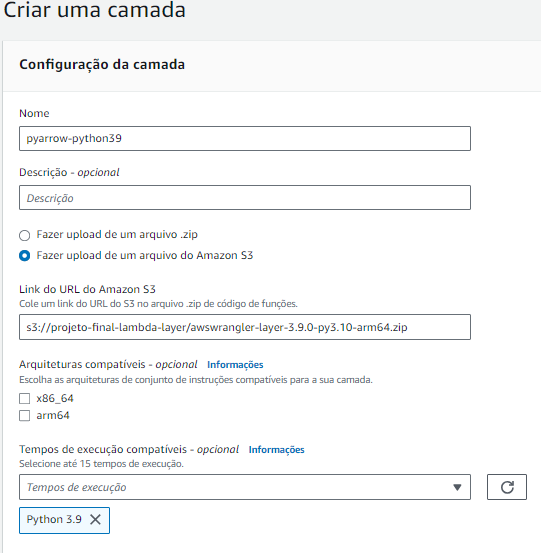

Após ser realizada a conexão, podemos fazer um teste, usando um DummyEvent na função Lambda, que retorna resposta "true", informando que está tudo correto.

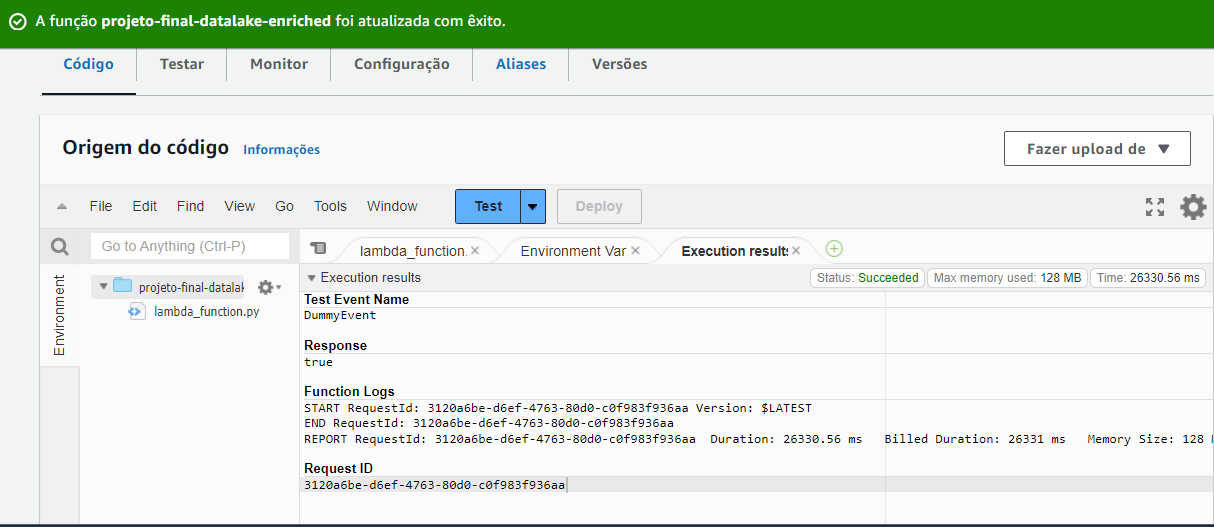

O resultado do teste é possível ser verificado no bucket .enriched do S3, onde é gerado um arquivo parquet contendo todas as mensagens enviadas no dia anterior D-1:

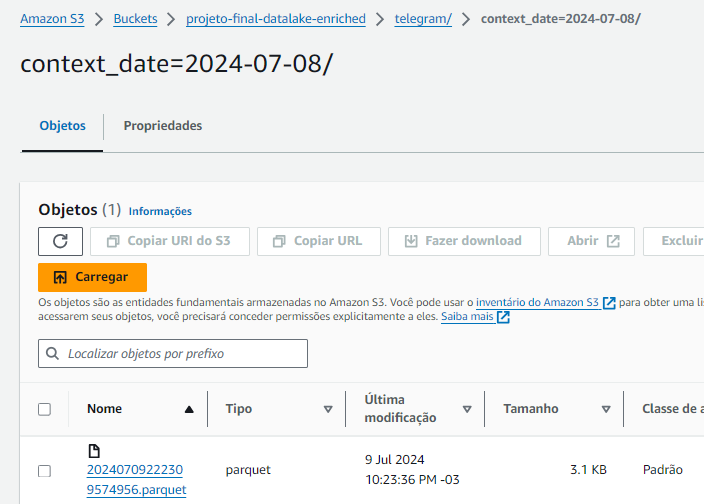

**4.3 AWS Event Bridge**

Na etapa de ETL, o AWS Event Bridge tem a função de ativar diariamente a função de ETL do AWS Lambda, funcionando assim como um scheduler.

Nota: Atente-se ao fato de que a função processa as mensagens do dia anterior (D-1).


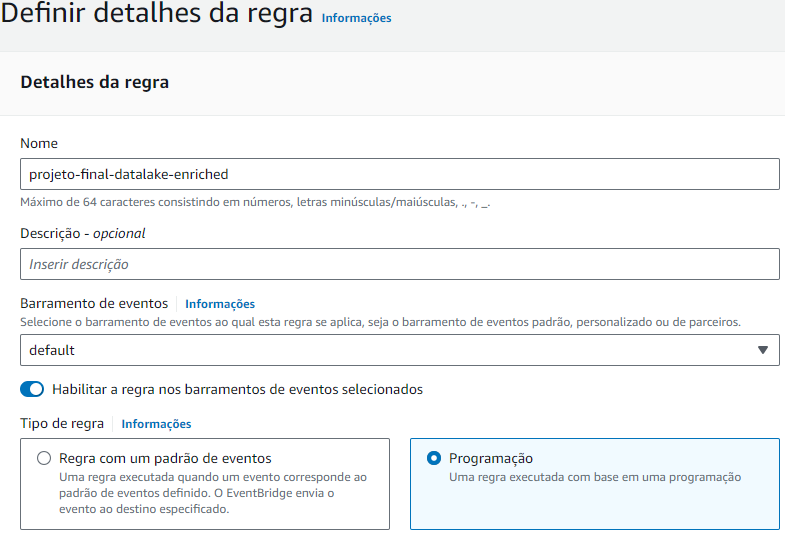

A regra criada é que todo dia, às 03h da manhã, o código será executado gerando o rquivo de todas as mensagens enviadas no dia anterior.

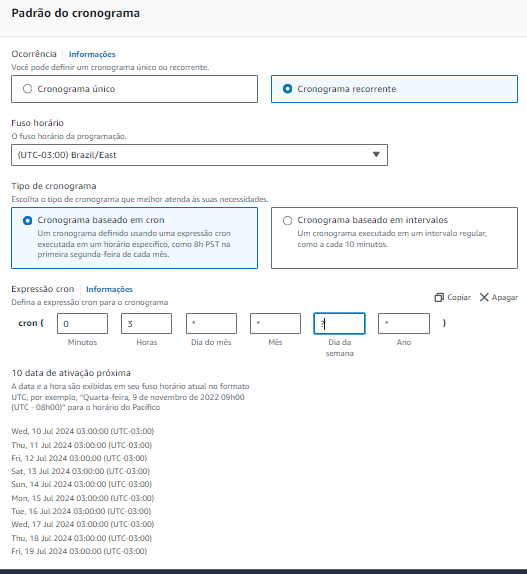

Aqui podemos ver o primeiro arquivo gerado automaticamente conforme programação feita no AWS Event Bridge. Arquivo parquet 10 Jul 2024 03:02:16 AM(Dados referentes mensagens enviadas dia 09/07/2024).

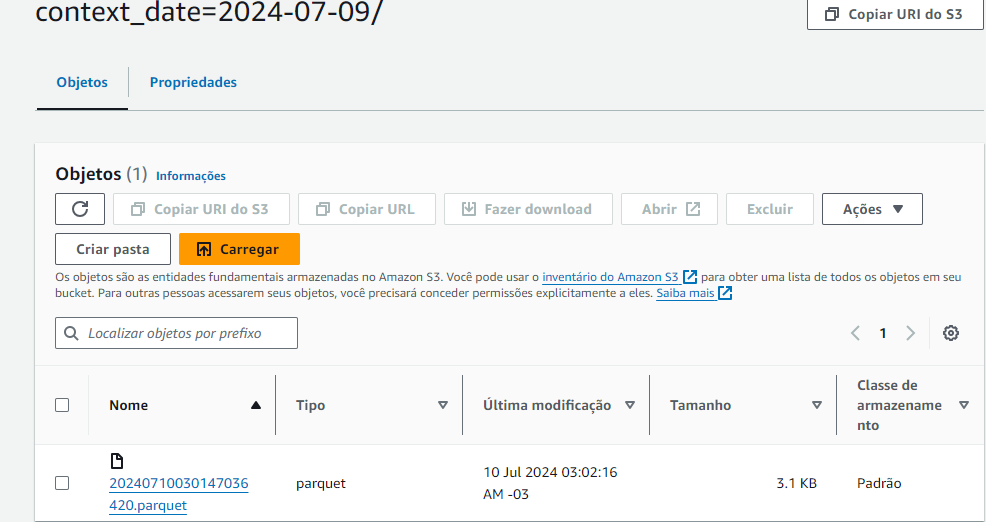

# **5. Apresentação**

A etapa de apresentação é reponsável por entregar o dado para os usuários (analistas, cientistas, etc.) e sistemas (dashboards, motores de consultas, etc.), idealmente através de uma interface de fácil uso, como o SQL, logo, essa é a única etapa que a maioria dos usuários terá acesso. Além disso, é importante que as ferramentas da etapa entregem dados armazenados em camadas refinadas, pois assim as consultas são mais baratas e o dados mais consistentes.

**5.1. AWS Athena**

Na etapa de apresentação, o AWS Athena tem função de entregar o dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, basta criar uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

In [ ]:
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://projeto-final-datalake-enriched/telegram/'

Foi criada então a tabela com nome "telegram" no AWS Athena, com as colunas informadas:

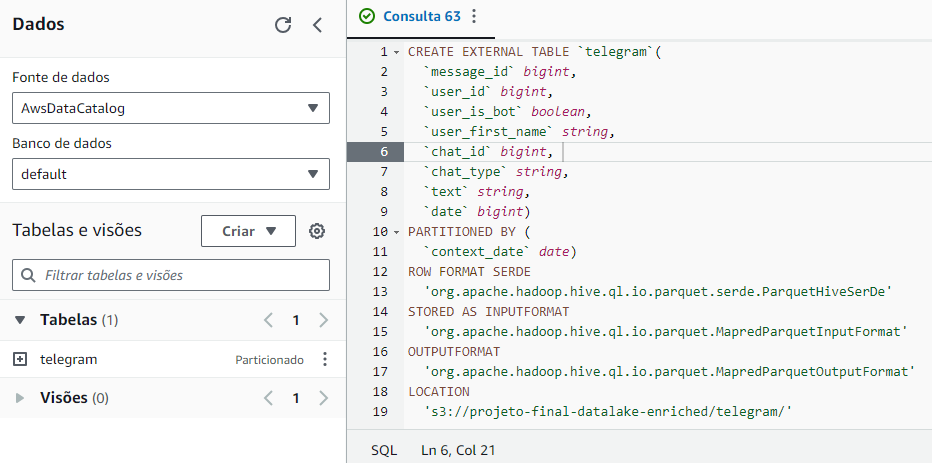

Colunas conforme informado no código acima:

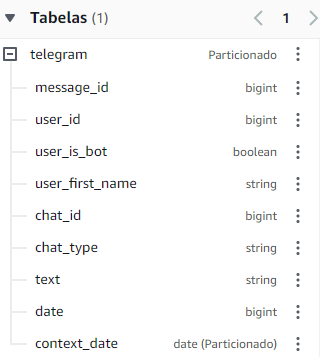

Por fim, adicione as partições disponíveis. É possível ver que foram geradas duas partições, que são os dois dias de arquivos de mensagens que temos: 08 e 09/07/2024.



In [ ]:
MSCK REPAIR TABLE `telegram`;

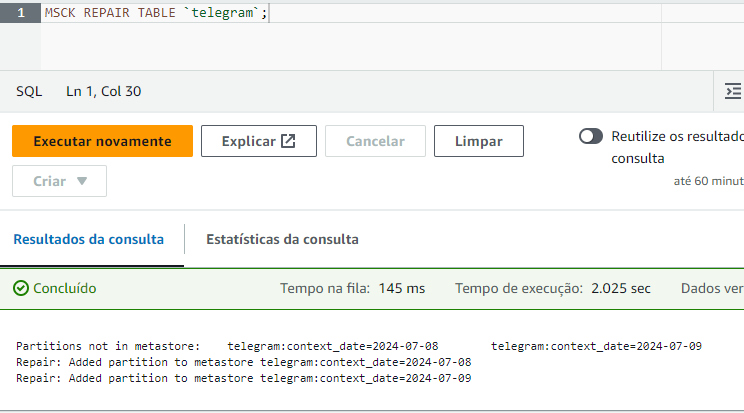

 **5.2. Analytics**

Vamos realizar agora as consultas, para verificar como estão os nossos dados para assim iniciar a análise.

Primeiramente, vamos iniciar a consulta das 10 primeiras linhas, para ver que resultados vamos obter:

In [ ]:
SELECT * FROM "telegram" LIMIT 10;

O resultado obtido dão as 10 primeiras linhas onde constam os dados que selecionamos para aparecer no cabeçalho da tabela. Podemos ver as mensagens de 'teste' enviadas.

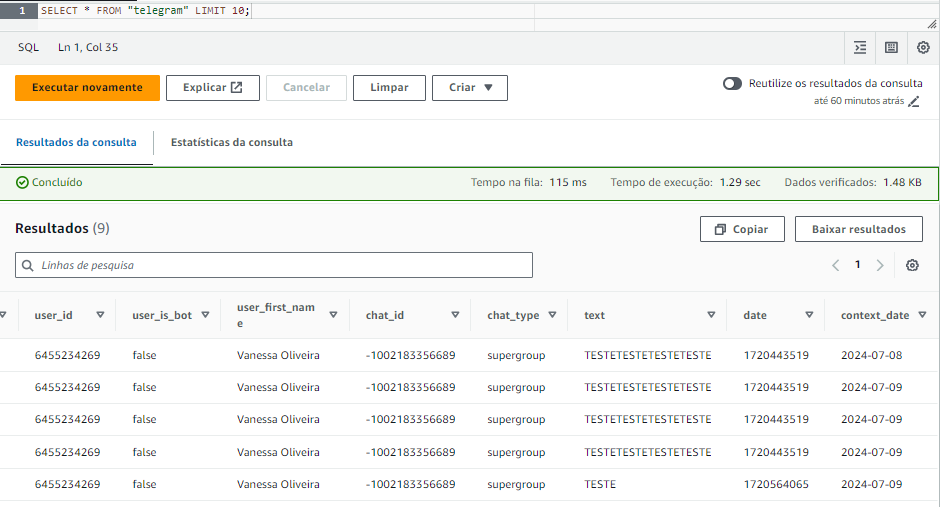

* Quantidade de mensagens por dia. Vemos que foram 8 mensagens dia 2024-07-09 e 1 mensagem dia 2024-07-08.

In [ ]:
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC

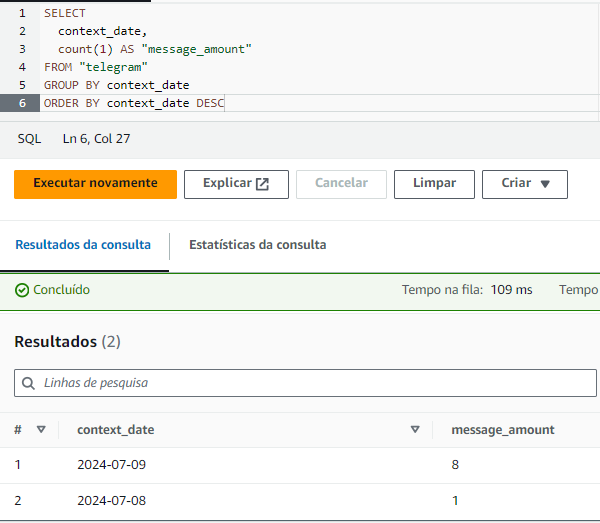

* Quantidade de mensagens por usuário por dia.

In [ ]:
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC

Vemos que a unica pessoa que mandou mensagem foi "Vanessa Oliveira".

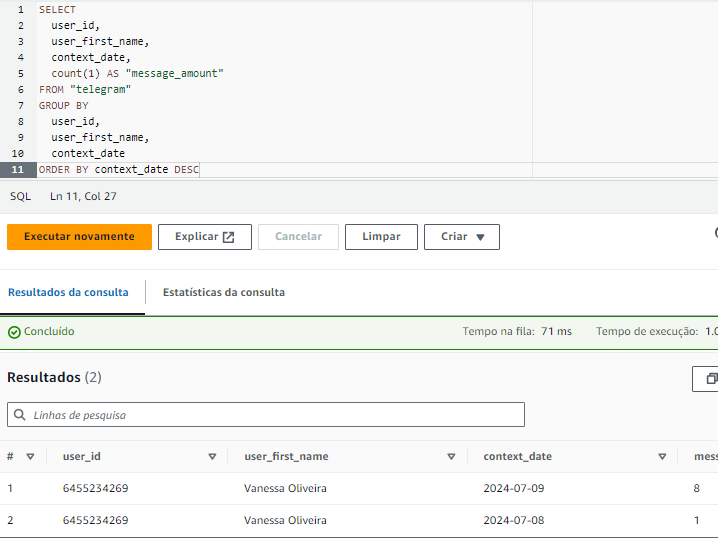

* Média do tamanho das mensagens por usuário por dia.

In [ ]:
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC

Vemos no "average_message_length" a média do tamanho das mensagens enviadas.

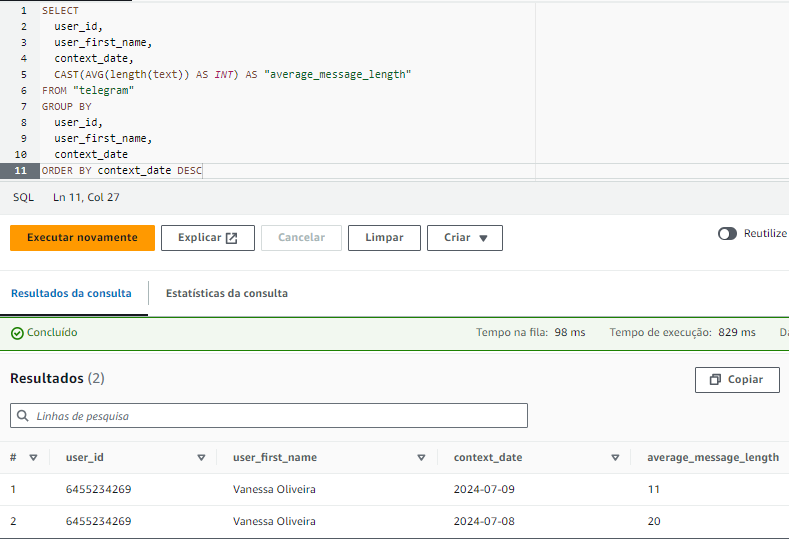

* Quantidade de mensagens por hora por dia da semana por número da semana.

In [ ]:
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday

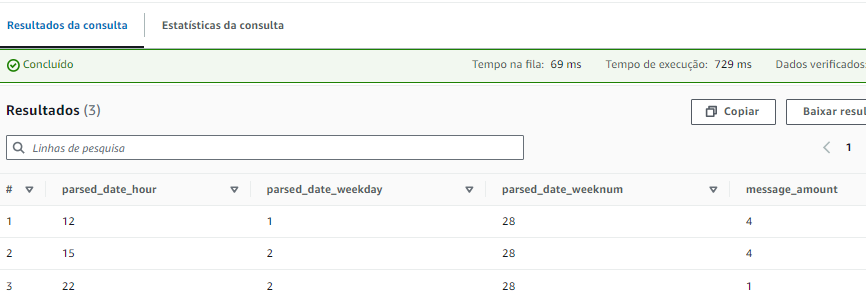

Com essas consultas, podemos tirar alguns insghts valiosos. Vamos utilizar como exemplo, a última consulta realizada, de quantidade de mensagens por hora por dia da semana por número da semana. Vamos utilizar como parâmetros a hora de envio de mensagens e a quantidade de mensagens.

Baixamos esses dados no AWS Athena em um arquivo CSV e rodamos em um gráfico python.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
telegram = pd.read_csv('telegram.csv')

In [5]:
telegram.head()

,parsed_date_hour,parsed_date_weekday,parsed_date_weeknum,message_amount
0,12,1,28,4
1,15,2,28,4
2,22,2,28,1


<ipython-input-17-f9ee38d10c38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parsed_date_hour', y='message_amount', data=telegram_grouped, palette="YlGnBu")


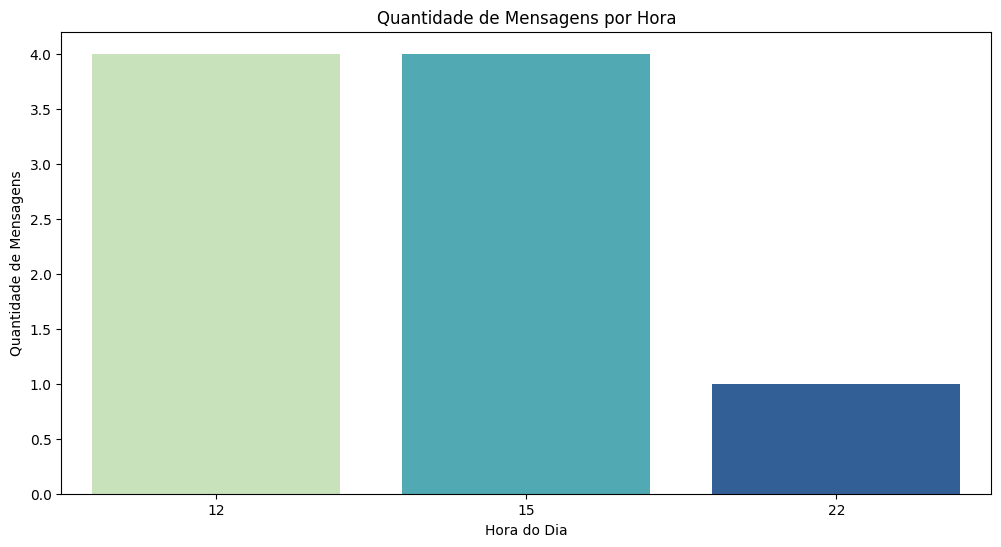

In [17]:
# Agrupar por 'parsed_date_hour' e somar 'message_amount'
telegram_grouped = telegram.groupby('parsed_date_hour').sum().reset_index()

# Gerando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='parsed_date_hour', y='message_amount', data=telegram_grouped, palette="YlGnBu")
plt.title('Quantidade de Mensagens por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Mensagens')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x horizontais
plt.show()

Podemos ver acima, que os horários de maior fluxo de mensagens, foi ao meio dia e às 15h.

Outro insight que podemos utilizar, é a quantidade de mensagens enviadas por pessoa. Assim podemos verificar, por exemplo, se algum cliente está com algum problema(devido alto número de solicitações enviadas) e assim tentar abordá-lo para resolver.

In [19]:
cliente = pd.read_csv('cliente.csv')


In [20]:
cliente.head()

,user_id,user_first_name,context_date,message_amount
0,6455234269,Vanessa Oliveira,2024-07-09,8
1,6455234269,Vanessa Oliveira,2024-07-08,1


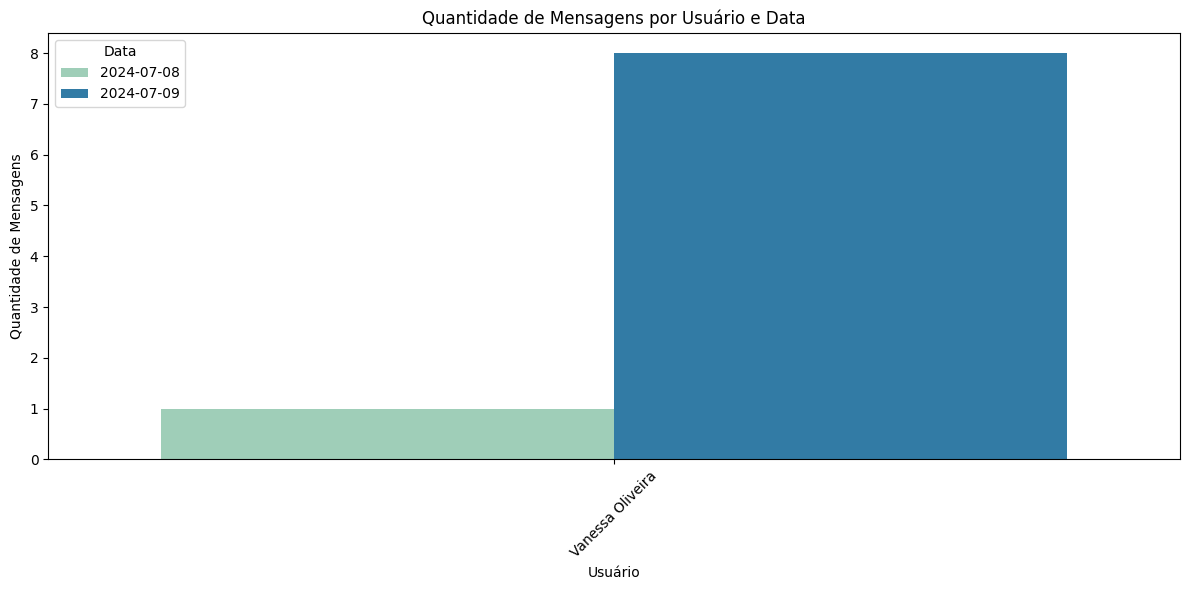

In [25]:
# Agrupar por 'user_first_name' e 'context_date' e somar 'message_amount'
cliente_grouped = cliente.groupby(['user_first_name', 'context_date'])['message_amount'].sum().reset_index()

# Gerando o gráfico de barras agrupado por 'user_first_name'
plt.figure(figsize=(12, 6))
sns.barplot(x='user_first_name', y='message_amount', hue='context_date', data=cliente_grouped, palette="YlGnBu")
plt.title('Quantidade de Mensagens por Usuário e Data')
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Mensagens')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor leitura
plt.legend(title='Data')  # Adicionar legenda para as datas
plt.tight_layout()
plt.show()

Podemos ver que o cliente entrou em contato dois dias seguidos e no segundo enviou muito mais mensagens, podendo indicar que o problema persiste, por exemplo.

# **6. Conclusão**

Ao concluir este projeto de pipeline de dados do Telegram, podemos destacar sua importância na capacidade de capturar, processar e analisar informações valiosas provenientes das interações dos usuários em tempo real. A implementação eficiente deste pipeline não apenas facilitou a coleta de dados brutos, mas também permitiu sua transformação em insights acionáveis que podem ser utilizados para melhorar serviços e explorar oportunidades de negócios.

A utilização de tecnologias de nuvem, como a Amazon Web Services (AWS), demonstrou ser crucial para a escalabilidade e a confiabilidade do pipeline, garantindo que os dados fossem armazenados e processados de maneira segura e eficiente. A integração de serviços como Lambda e S3 simplificou significativamente a gestão e o processamento dos dados, enquanto o uso de formatos como Parquet e SQL possibilitou análises detalhadas e flexíveis.

Além disso, a automação e a orquestração do pipeline através do AWS Event Bridge asseguraram que todas as etapas do processo ocorressem de maneira sincronizada e sem intervenção manual excessiva, aumentando a eficiência operacional.

Com base nos resultados obtidos, este projeto não apenas cumpriu seus objetivos iniciais, mas também estabeleceu uma base sólida para futuras expansões e aprimoramentos. A capacidade de extrair insights em tempo real a partir das interações dos usuários no Telegram abre caminho para a tomada de decisões mais informadas e para a criação de estratégias mais eficazes no contexto digital.

Em suma, o pipeline de dados implementado não só demonstrou sua eficácia técnica, mas também reforçou a importância estratégica de utilizar dados como um recurso fundamental para a inovação e o crescimento organizacional.